In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Split data into 3 dataframe for each flower class

In [4]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

### Plotting Sepal width and height

Text(0, 0.5, 'sepal width (cm)')

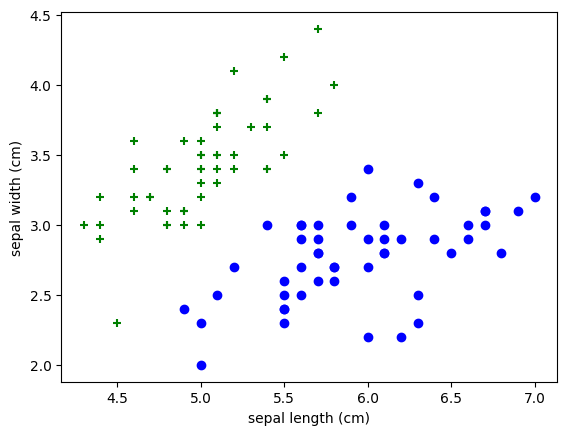

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# Train Test splitting

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN Algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors is the value of K
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [11]:
predict = knn.predict(X_test)
predict

array([2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 2])

# Confusion Matrix

Text(58.222222222222214, 0.5, 'Truth')

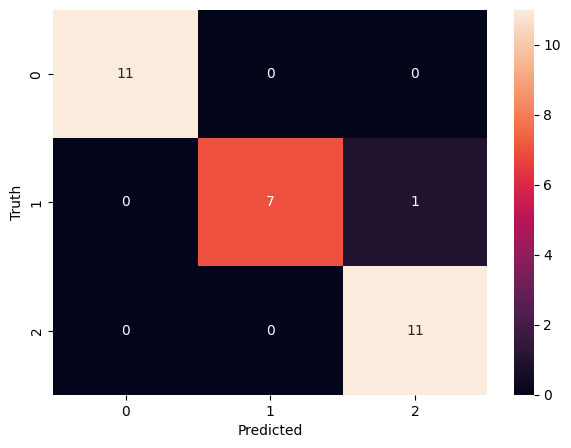

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification Report
Print classification report for precesion, recall and f1-score for each classes

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Watch codebasics Deep Learning Precision recall video #16 to understand what is it